## **Capstone Project 4**
### Deep Learning with Keras and TensorFlow
***Course-End Project***

by Santanu Chandra

email : santanu.chandra@gmail.com

Submission Date : 06-24-2025

# **1. Project Statement**

## Lending Club Loan Data Analysis

**Objective:**

Create a model that predicts whether or not a loan will be default using historical data.

**Problem Statement:**  
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Analysis to be done:**

Perform data preprocessing and build a deep learning prediction model.


# **2. Data Collection**

## **2.1 Import Libraries for Data Analysis**

In [295]:
pip install feature-engine

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Hide warnings if you are presenting your project to an audience to make your code look cleaner
import warnings
warnings.filterwarnings('ignore')

## **2.2 Load the data**

In [297]:
# Load the dataset
loan_data_df = pd.read_csv('loan_data.csv')

# **3. Data Exloration and Analysis**

We will conduct comprehensive Exploratory Data Analysis (EDA) of the Loan Dataset

## **3.1 Data Size, Variables, Type**

In [115]:
# Display basic row and column information
print(f"Dataset size : {loan_data_df.shape}")

Dataset size : (9578, 14)


**Observation**

The dataset set has **14 variables**

Total Number of **dataset = 9578**


In [116]:
# Understand Dataset columns and Memory usage
loan_data_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.6 MB


**Observation**

Categorical Variable  - 1 ***Purpose*** is the only categorical variable

Numerical Variable    - 13

Memory usage is manageable


In [117]:
# Display basic information on Categorical and Numerical Data
data_types = loan_data_df.dtypes
print(data_types)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [118]:
data_types.value_counts()

int64      7
float64    6
object     1
Name: count, dtype: int64

### **Dataset columns and definition:**

●	**credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

●	**purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

●	**int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

●	**installment:** The monthly installments owed by the borrower if the loan is funded.

●	**log.annual.inc:** The natural log of the self-reported annual income of the borrower.

●	**dti:** The debt-to-income ratio of the borrower (the amount of debt divided by annual income).

●	**fico:** The FICO credit score of the borrower.

●	**days.with.cr.line:** The number of days the borrower has had a credit line.

●	**revol.bal:** The borrower's revolving balance (the amount unpaid at the end of the credit card billing cycle).

●	**revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

●	**inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

●	**delinq.2yrs:** The number of times the borrower has been 30+ days past due on a payment in the past 2 years.

●	**pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


## **3.2 Cardinality Test - Find Unique Values**

In [119]:
# Calculate cardinality of Each COlumns starting with credit.policy
cardinality = loan_data_df['credit.policy'].nunique()
print(f"Cardinality of 'credit.policy' column: {cardinality}")


Cardinality of 'credit.policy' column: 2


In [120]:
# Find the unique values of each Data type
unique_credit_policies = loan_data_df['credit.policy'].unique()
print(unique_credit_policies)
print(unique_credit_policies.shape)

[1 0]
(2,)


In [121]:
# Find the unique values of each Data type
unique_purpose = loan_data_df['purpose'].unique()
print(unique_purpose)
print(unique_purpose.shape)

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
(7,)


In [122]:
# Find the unique values of each Data type
unique_int_rate = loan_data_df['int.rate'].unique()
print(unique_int_rate)
print(unique_int_rate.shape)

[0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533 0.0712 0.1438 0.1565 0.1467
 0.1312 0.147  0.1407 0.1014 0.1046 0.133  0.0983 0.1393 0.092  0.1236
 0.1362 0.1078 0.1583 0.1109 0.1141 0.1267 0.1204 0.0951 0.1172 0.1299
 0.1488 0.152  0.1425 0.1836 0.1615 0.06   0.0832 0.1261 0.0945 0.1197
 0.1387 0.0976 0.1292 0.0737 0.0768 0.1166 0.1418 0.1545 0.1482 0.1703
 0.145  0.1671 0.1576 0.1608 0.164  0.1734 0.1051 0.157  0.1222 0.1273
 0.1379 0.1253 0.1128 0.1286 0.1287 0.097  0.1001 0.1538 0.1191 0.1254
 0.1159 0.138  0.1096 0.1064 0.1349 0.1033 0.1475 0.1601 0.1507 0.1412
 0.1633 0.1696 0.1146 0.1304 0.1272 0.1209 0.1083 0.1178 0.1241 0.1588
 0.0907 0.102  0.1336 0.1557 0.0938 0.1493 0.1462 0.1367 0.0963 0.1126
 0.144

In [123]:
# Find the unique values of each Data type
unique_installment = loan_data_df['installment'].unique()
print(unique_installment)
print(unique_installment.shape)

[829.1  228.22 366.86 ... 161.01 257.7  853.43]
(4788,)


In [124]:
# Find the unique values of each Data type
unique_log_annual_inc = loan_data_df['log.annual.inc'].unique()
print(unique_log_annual_inc)
print(unique_log_annual_inc.shape)

[11.35040654 11.08214255 10.37349118 ... 12.29225034 10.99909533
 10.11047245]
(1987,)


In [125]:
# Find the unique values of each Data type
unique_dti = loan_data_df['dti'].unique()
print(unique_dti)
print(unique_dti.shape)

[19.48 14.29 11.63 ... 10.31 23.74 24.05]
(2529,)


In [126]:
# Find the unique values of each Data type
unique_fico = loan_data_df['fico'].unique()
print(unique_fico)
print(unique_fico.shape)

[737 707 682 712 667 727 722 677 662 767 747 702 672 797 772 782 802 812
 742 692 777 762 757 787 717 752 792 627 687 697 732 822 632 807 817 827
 642 647 652 657 637 612 617 622]
(44,)


In [127]:
# Find the unique values of each Data type
unique_days_with_cr_line = loan_data_df['days.with.cr.line'].unique()
print(unique_days_with_cr_line)
print(unique_days_with_cr_line.shape)

[ 5639.958333  2760.        4710.       ...  3423.041667  5916.
 10474.      ]
(2687,)


In [128]:
# Find the unique values of each Data type
unique_revol_bal = loan_data_df['revol.bal'].unique()
print(unique_revol_bal)
print(unique_revol_bal.shape)

[28854 33623  3511 ...   184 10036 37879]
(7869,)


In [129]:
# Find the unique values of each Data type
unique_revol_util = loan_data_df['revol.util'].unique()
print(unique_revol_util)
print(unique_revol_util.shape)

[ 52.1   76.7   25.6  ... 104.3  106.4   69.14]
(1035,)


In [130]:
# Find the unique values of each Data type
unique_inq_last_6mths = loan_data_df['inq.last.6mths'].unique()
print(unique_inq_last_6mths)
print(unique_inq_last_6mths.shape)

[ 0  1  2  3  4  5  6  8  7 33  9 18 14 15 13 12 10 19 11 16 20 27 25 28
 31 24 17 32]
(28,)


In [131]:
# Find the unique values of each Data type
unique_delinq_2yrs = loan_data_df['delinq.2yrs'].unique()
print(unique_delinq_2yrs)
print(unique_delinq_2yrs.shape)

[ 0  1  2  4  3  5  6 13  7  8 11]
(11,)


In [132]:
# Find the unique values of each Data type
unique_pub_rec = loan_data_df['pub.rec'].unique()
print(unique_pub_rec)
print(unique_pub_rec.shape)

[0 1 2 3 4 5]
(6,)


In [133]:
# Find the unique values of each Data type
unique_not_fully_paid = loan_data_df['not.fully.paid'].unique()
print(unique_not_fully_paid)
print(unique_not_fully_paid.shape)

[0 1]
(2,)


## **3.3 Display of Data**

In [134]:
# Display the first 10 rows of the dataframe
loan_data_df.head(10)

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   
5              1         credit_card    0.0788       125.13       11.904968   
6              1  debt_consolidation    0.1496       194.02       10.714418   
7              1           all_other    0.1114       131.22       11.002100   
8              1    home_improvement    0.1134        87.19       11.407565   
9              1  debt_consolidation    0.1221        84.12       10.203592   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   
5  16.98   727        6120.041667      50807        51.0               0   
6   4.00   667        3180.041667       3839        76.8               0   
7  11.08   722        5116.000000      24220        68.6               0   
8  17.25   682        3989.000000      69909        51.1               1   
9  10.00   707        2730.041667       5630        23.0               1   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0  
5            0        0               0  
6            0        1               1  
7            0        0               1  
8            0        0               0  
9            0        0               0

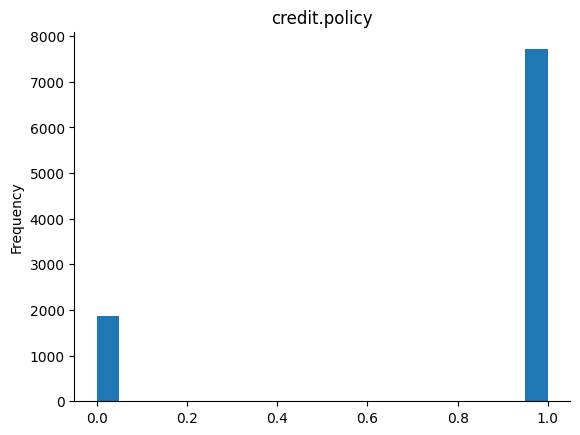

In [135]:
# @title credit.policy

loan_data_df['credit.policy'].plot(kind='hist', bins=20, title='credit.policy')
plt.gca().spines[['top', 'right',]].set_visible(False)

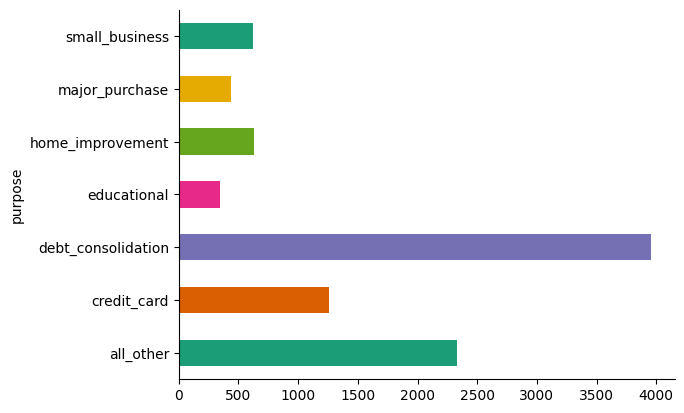

In [136]:
# @title purpose
loan_data_df.groupby('purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [137]:
#from sklearn.preprocessing import OneHotEncoder

## Perform one hot encoding for Purpose
#loan_data_df = pd.get_dummies(loan_data_df, columns=['purpose'])
#print(loan_data_df.head())

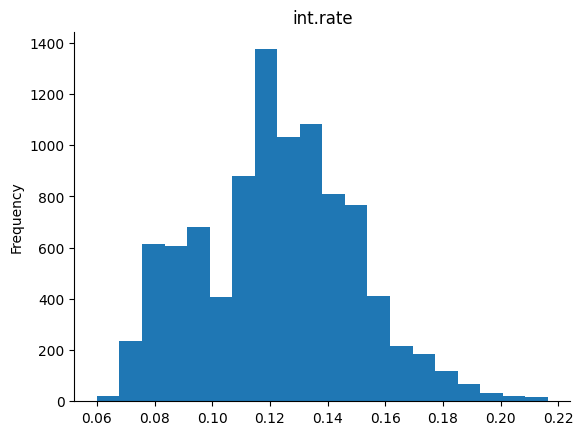

In [138]:
# @title int.rate

loan_data_df['int.rate'].plot(kind='hist', bins=20, title='int.rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

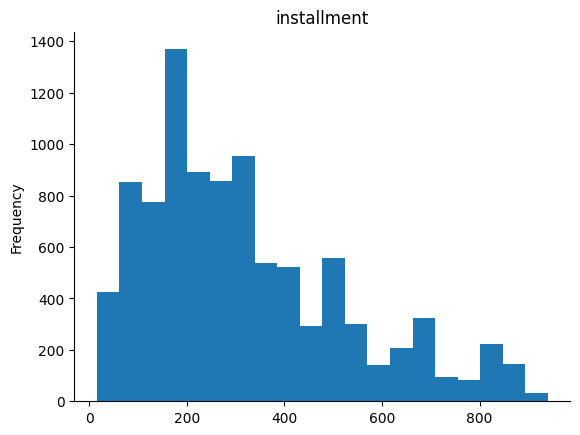

In [139]:
# @title installment

loan_data_df['installment'].plot(kind='hist', bins=20, title='installment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [140]:
# @title log.annual.inc
loan_data_df['log.annual.inc'].plot(kind='hist', bins=20, title='log.annual.inc')
plt.gca().spines[['top', 'right',]].set_visible(False)

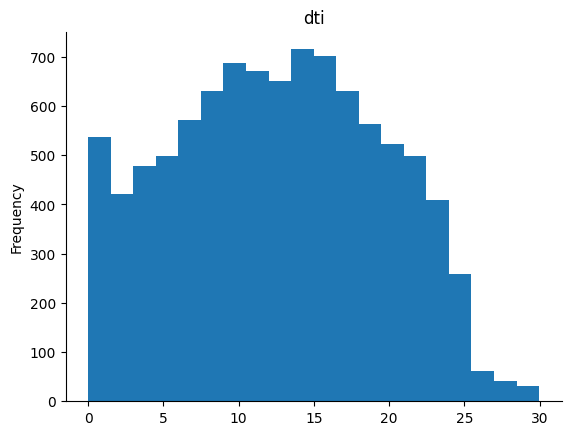

In [141]:
#@title dti
loan_data_df['dti'].plot(kind='hist', bins=20, title='dti')
plt.gca().spines[['top', 'right',]].set_visible(False)

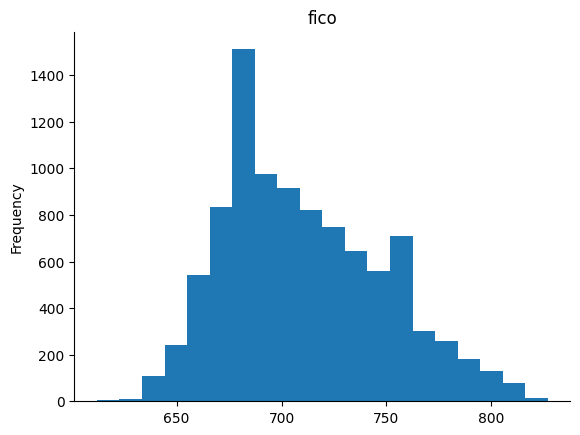

In [142]:
#@title  fico
loan_data_df['fico'].plot(kind='hist', bins=20, title='fico')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'days.with.cr.line'}, ylabel='Frequency'>

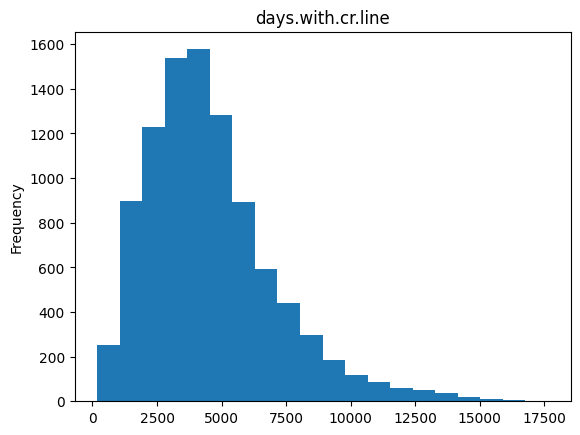

In [143]:
#@title days.with.cr.line
loan_data_df['days.with.cr.line'].plot(kind='hist', bins=20, title='days.with.cr.line')

<Axes: title={'center': 'revol.bal'}, ylabel='Frequency'>

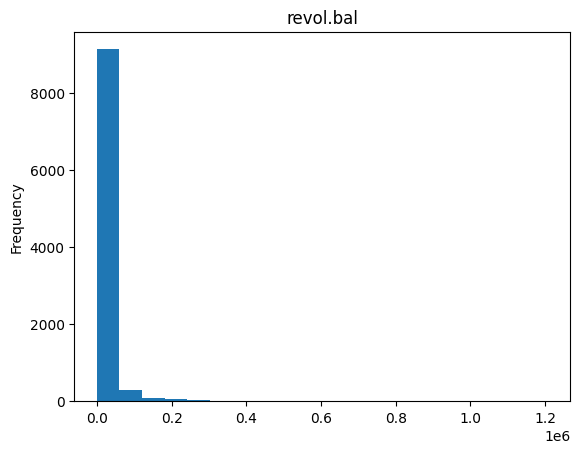

In [144]:
#@title revol.bal
loan_data_df['revol.bal'].plot(kind='hist', bins=20, title='revol.bal')

<Axes: title={'center': 'revol.util'}, ylabel='Frequency'>

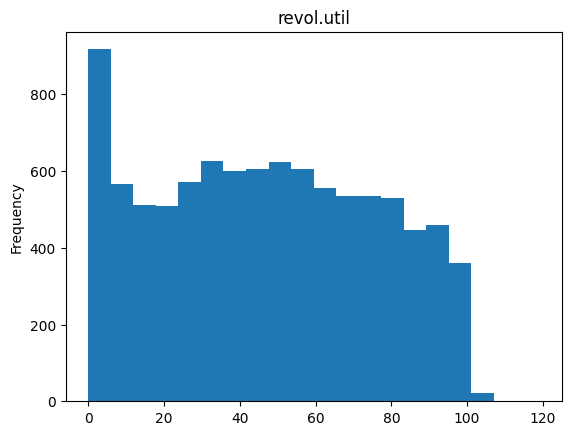

In [145]:
#@title revol.util
loan_data_df['revol.util'].plot(kind='hist', bins=20, title='revol.util')

In [146]:
#@title inq.last.6mths
loan_data_df['inq.last.6mths'].plot(kind='hist', bins=20, title='inq.last.6mths')

<Axes: title={'center': 'inq.last.6mths'}, ylabel='Frequency'>

<Axes: title={'center': 'delinq.2yrs'}, ylabel='Frequency'>

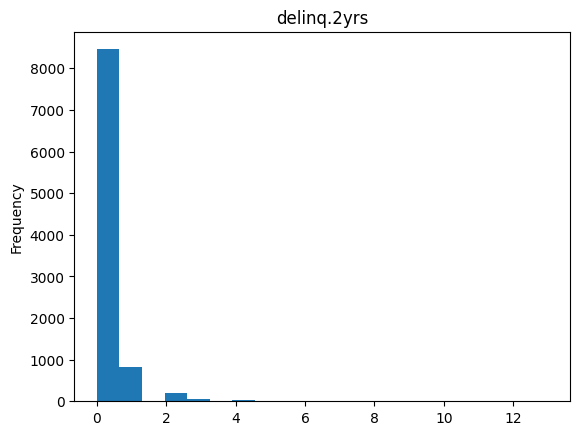

In [147]:
#@title delinq.2yrs
loan_data_df['delinq.2yrs'].plot(kind='hist', bins=20, title='delinq.2yrs')

In [148]:
#@title pub.rec
loan_data_df['pub.rec'].plot(kind='hist', bins=20, title='pub.rec')

<Axes: title={'center': 'pub.rec'}, ylabel='Frequency'>

# **4. Feature Engineering**



* Missing values
* Label encoding
* Variance stabilizing
* Outlier handling
* Scaling
* Dimensionality reduction

Deliverable:
- Feature engineering script(s)

In [151]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from feature_engine.imputation import MeanMedianImputer

## **4.1 Missing Values**


In [153]:
# Missing values
loan_data_df.isnull().mean().sort_values(ascending=False)

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [154]:
#find missing values
loan_data_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**Observation**

There are no missing data

## **4.2 Label Encoding**

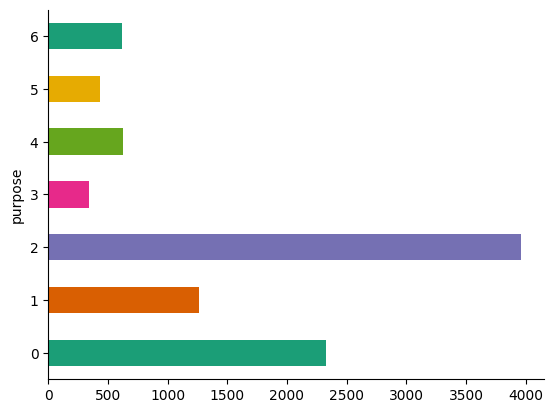

In [157]:
# Perform Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
loan_data_df['purpose'] = label_encoder.fit_transform(loan_data_df['purpose'])
loan_data_df.groupby('purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


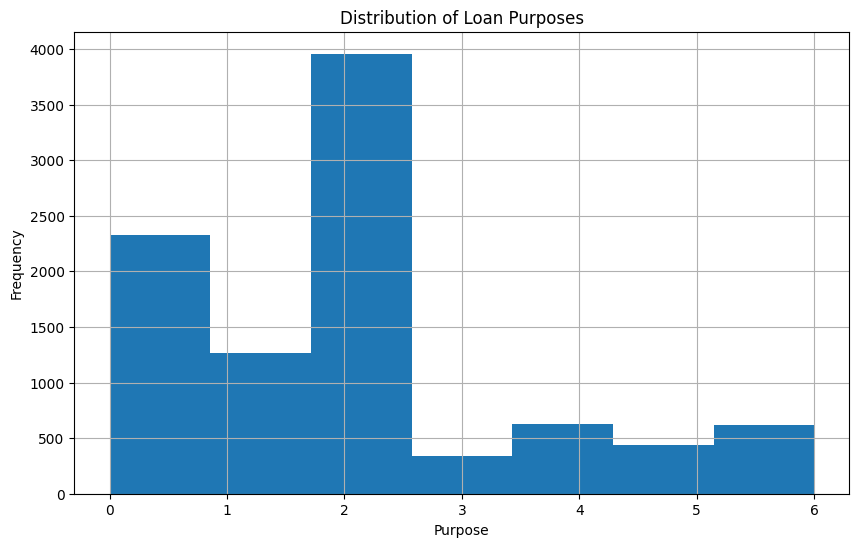

(9578, 14)

In [158]:
# Create a histogram
plt.figure(figsize=(10, 6))
loan_data_df['purpose'].hist(bins=len(loan_data_df['purpose'].unique()))
plt.title('Distribution of Loan Purposes')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.show()
loan_data_df.shape

In [159]:
## Size, variables and dtypes
loan_data_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


## **4.3 Cardinality Test**

In [160]:
# Rare values (for categorical ONLY)
loan_data_df.value_counts()

credit.policy  purpose  int.rate  installment  log.annual.inc  dti    fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid
1              6        0.2121    755.69       11.248960       5.72   672   1440.000000        500        83.3        1               0            0        0                 1
0              0        0.0712    30.94        10.819778       1.10   772   5910.000000        0          0.8         3               0            0        0                 1
                        0.0737    279.41       10.714418       15.95  737   5071.000000        4964       47.7        4               0            0        0                 1
                        0.0743    49.72        8.160518        5.14   752   930.041667         506        5.9         0               0            0        0                 1
                                  77.69        10.034516       0.53   747   3630.000000        416        10.4        5               0            0        1                 1
                                                                                                                                                                             ..
                        0.0775    156.11       12.611538       5.38   757   5641.000000        0          23.5        4               0            0        0                 1
                                               11.156251       8.81   772   6389.958333        0          7.3         4               0            0        0                 1
                        0.0774    156.10       12.487485       11.09  762   3600.000000        163772     15.5        0               0            0        0                 1
                        0.0768    405.48       10.736310       23.64  712   3240.000000        58996      55.7        3               0            0        1                 1
                                  374.29       11.225243       20.74  727   3090.000000        94064      57.6        0               0            0        0                 1
Name: count, Length: 9578, dtype: int64

## **4.3 Normality Test**

### **Shapiro-Wilk Test**

The Shapiro-Wilk test is a statistical test used to determine whether a dataset follows a normal distribution. It is particularly useful for small to moderately sized samples.

**Components**

**statistic:** This is the test statistic (W) produced by the Shapiro-Wilk test. It measures how well the data conforms to a normal distribution. The value of W ranges from 0 to 1, where values closer to 1 indicate that the data is more likely to be normally distributed.

**p_value:** This is the p-value associated with the test statistic. It helps you decide whether to reject the null hypothesis. The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed.

**Interpreting the Results**

**High p-value (p > 0.05):**F ail to reject the null hypothesis. This means there is no significant deviation from normality, and the data can be considered normally distributed.

**Low p-value (p ≤ 0.05):** Reject the null hypothesis. This indicates that the data significantly deviates from normality.

Shapiro-Wilk Test Statistic: 0.9219
p-value: 7.50e-57


<Axes: >

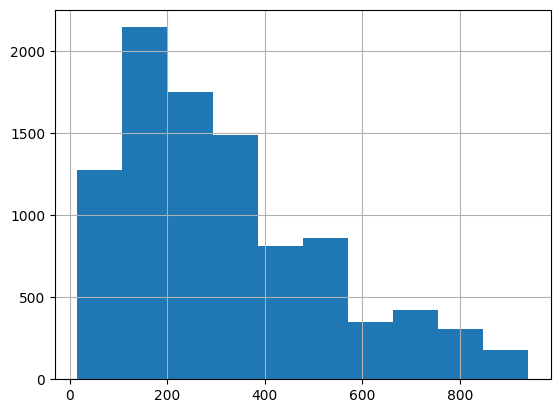

In [161]:
import pandas as pd
from scipy.stats import shapiro

statistic, p_value = shapiro(loan_data_df['installment'])

# Print Shapiro-Wilk Test Statistic in 4 decimal format
print("Shapiro-Wilk Test Statistic: {:.4f}".format(statistic))


# Print p-value in scientific format
print("p-value: {:.2e}".format(p_value))

loan_data_df['installment'].hist()

### **Observation**

High statistic value (0.92) indicates the data is close to normal distribution. A normla distribution should give a value of 1.0
Low p-value indicates we can reject the null hypothesis that is normal distribution.

This data is **not normally distributed**, but looks close



## **4.4 Correlation Analysis**

### **4.4.1 Heat Map**

<function matplotlib.pyplot.show(close=None, block=None)>

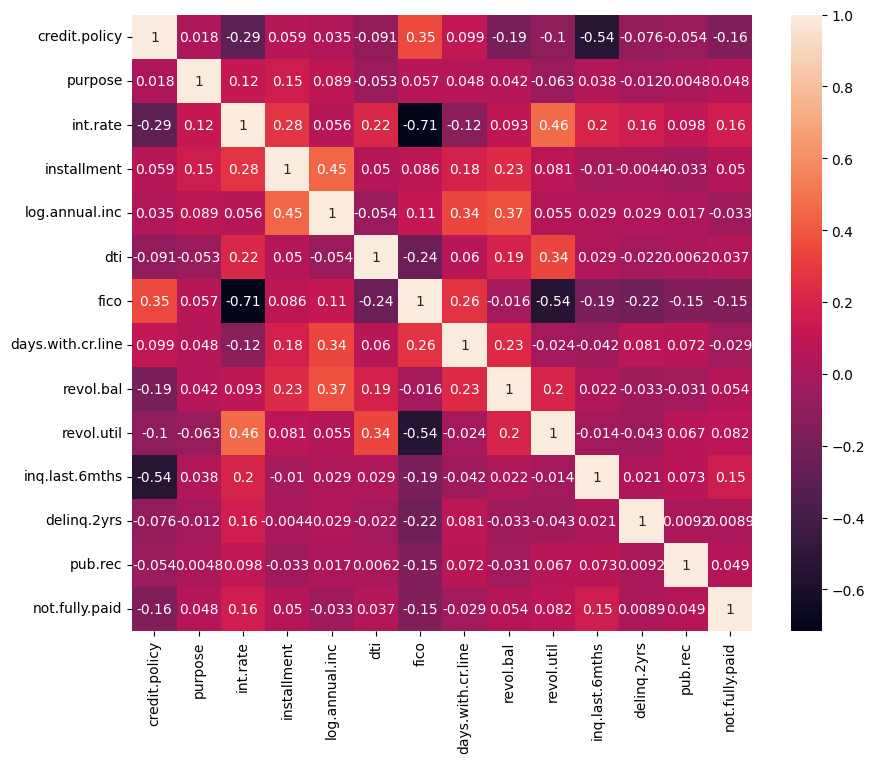

In [175]:
# Correlation Analysis
# Heat Map

# Set the figure size
plt.figure(figsize=(10, 8))


# Create the heatmap
sns.heatmap(loan_data_df.corr(), annot=True)

# Show the plot
plt.show


### **4.4.2 Pair Plot**

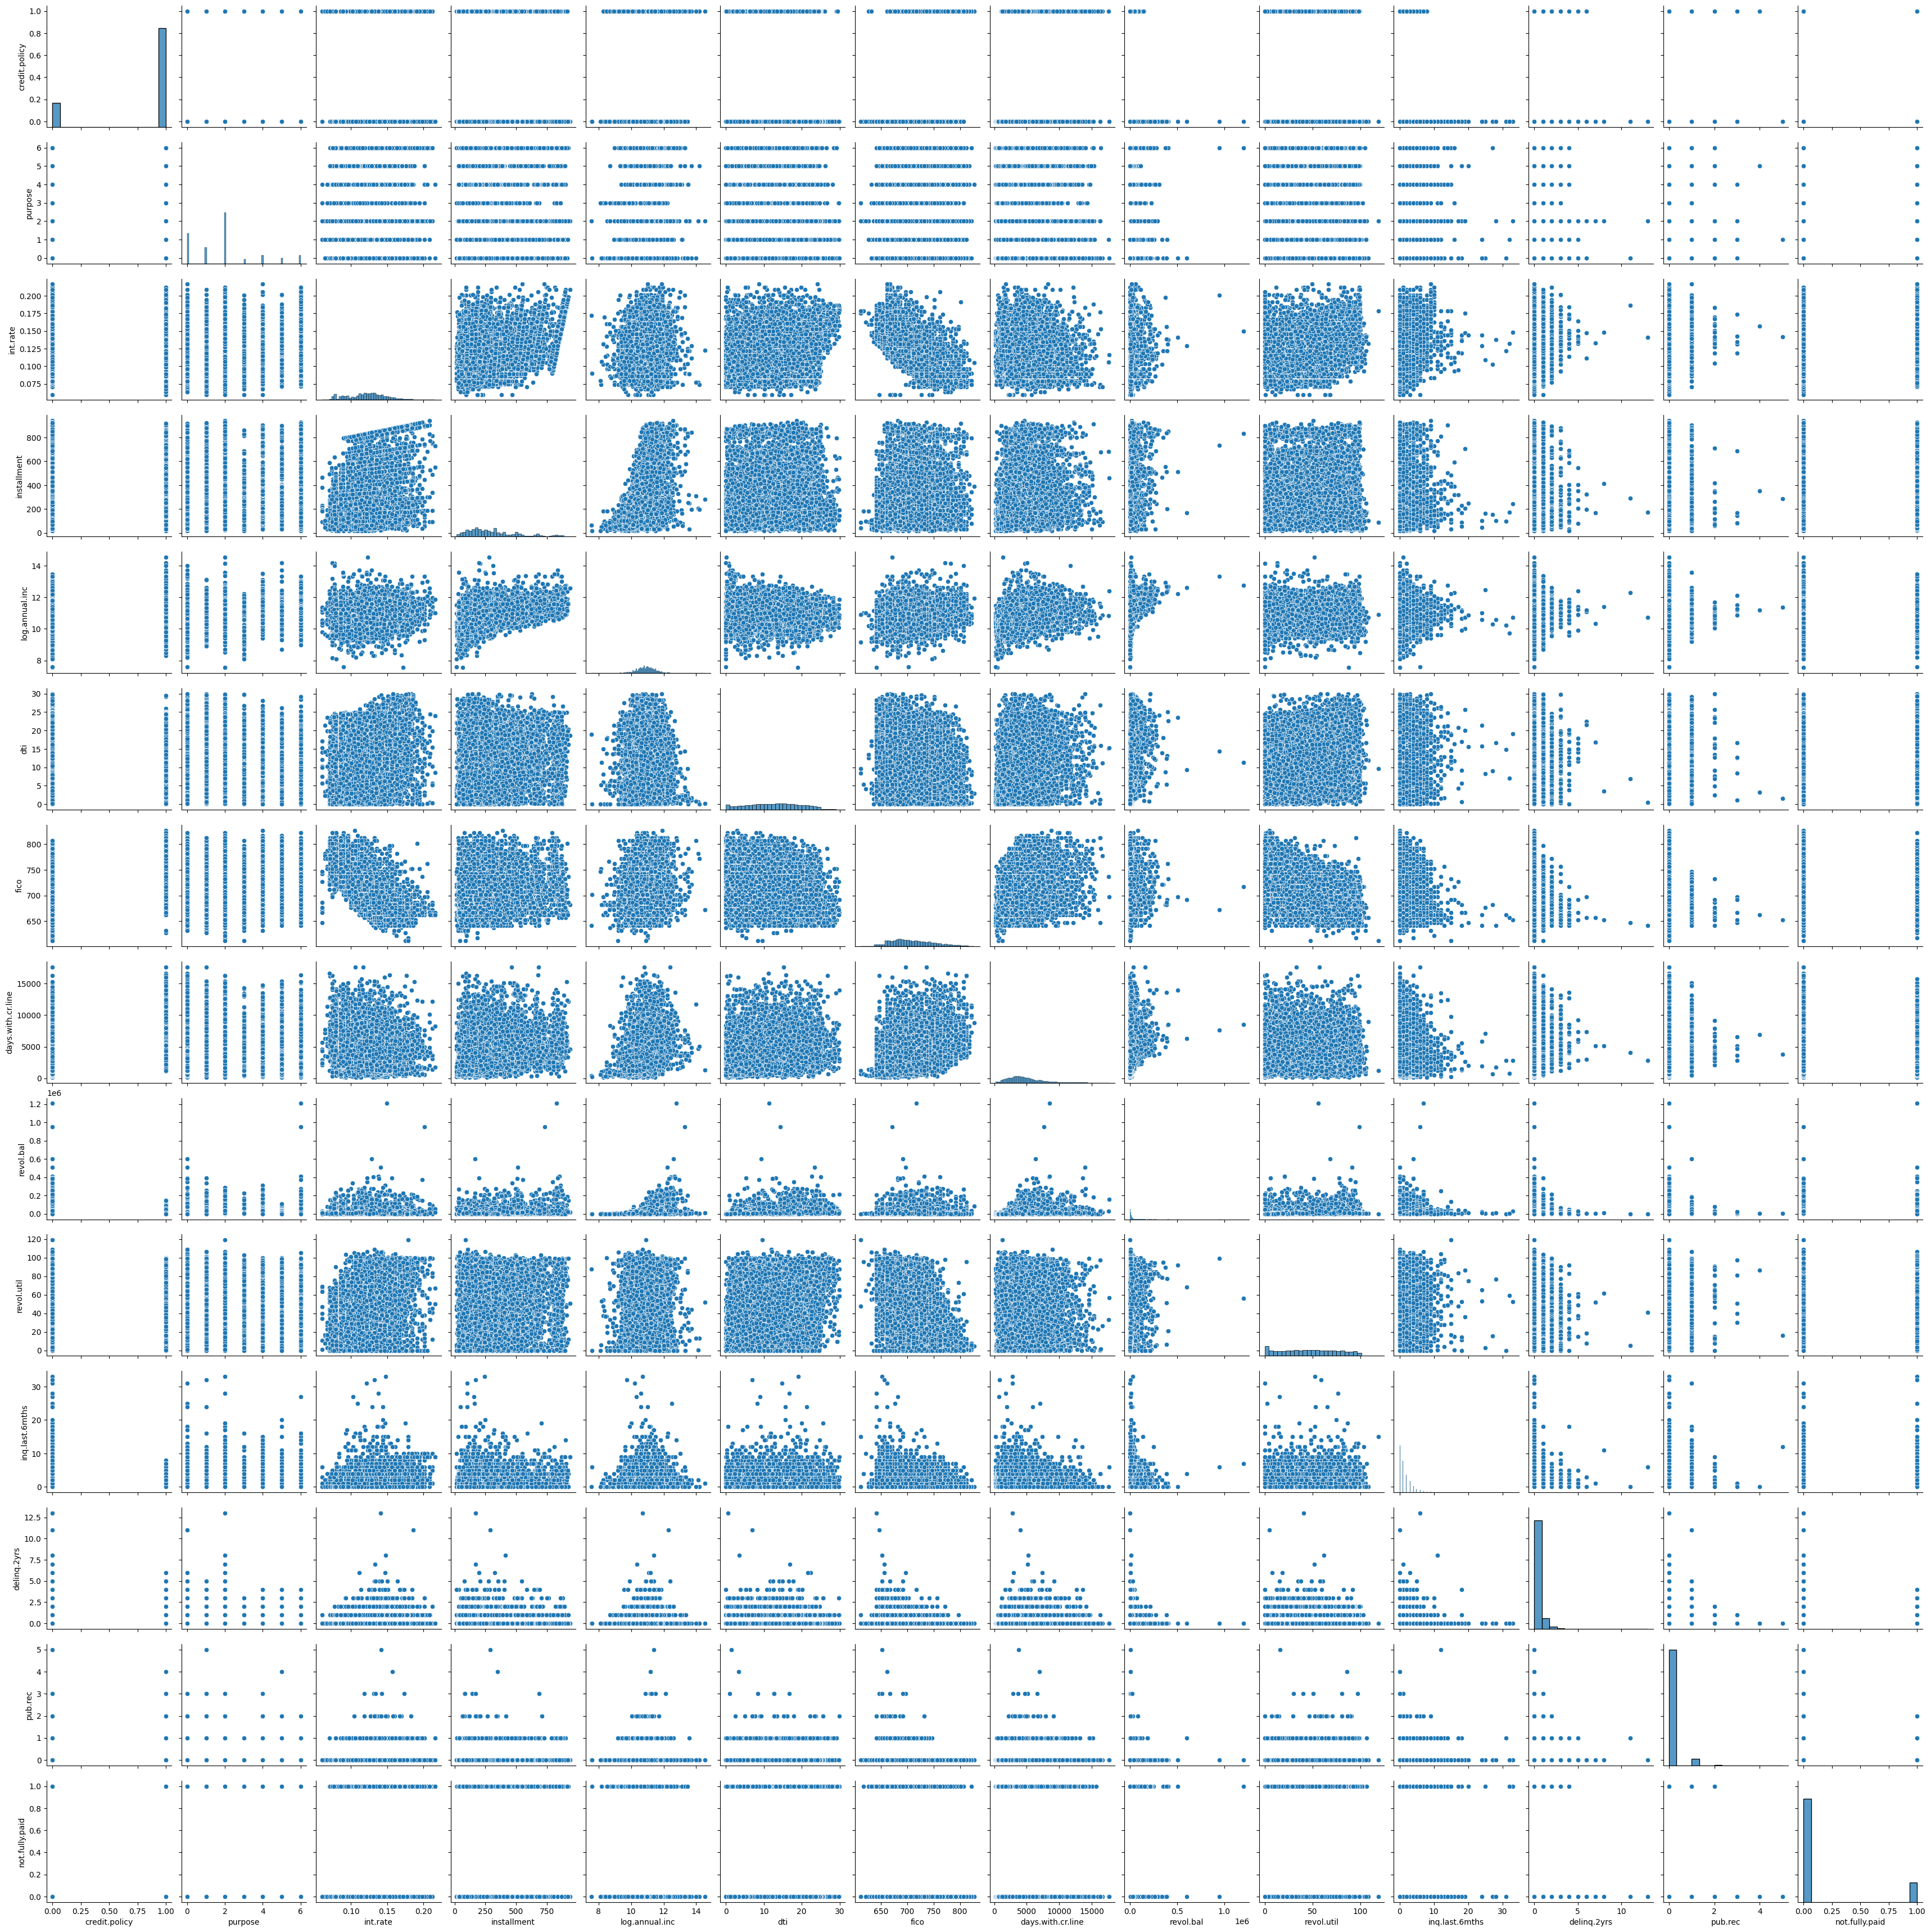

In [174]:
# Pairplot
sns.pairplot(loan_data_df)

plt.show()

### **4.4.3 Statistical test**

In [180]:
# Perform Pearson Correlation Test to identify which feature has high correlation > 0.8

# Calculate Pearson correlation coefficients
corr_matrix = loan_data_df.corr()

# Identify highly correlated features with correlation value > 0.8
high_corr_features = []
for i in range(len(corr_matrix.columns)):
  for j in range(i+1, len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[i, j]) > 0.8:
      high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print the highly correlated features

if len(high_corr_features) == 0:
  print("No highly correlated features found.")
else:
  print("Highly correlated features (correlation > 0.8):")
  for feature_pair in high_corr_features:
    print(f"{feature_pair[0]} and {feature_pair[1]} with correlation {feature_pair[2]:.4f}")



No highly correlated features found.


# **5.0 Define Neural Network**

## **5.1 Define Input/Output Data**

In [192]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [193]:
#  Define target and independent variables
X_train = loan_data_df.drop('not.fully.paid', axis=1)
y_train = loan_data_df['not.fully.paid']

In [194]:
X_train.shape

(9578, 13)

In [195]:
y_train.shape

(9578,)

## **5.2 Develop NN model**

### Step 1 : Define Architecture

In [291]:
# Define architecture

model_01 = Sequential()
model_01.add(Input(shape=(13,)))
model_01.add(Dense(50, activation='relu'))
model_01.add(Dense(25, activation='relu'))
model_01.add(Dense(13, activation='relu'))
model_01.add(Dense(1, activation='linear'))

In [292]:
model_01.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 50)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 13)             │           338 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,327 (9.09 KB)

 Trainable params: 2,327 (9.09 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2 : Compile

In [293]:
model_01.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

### Step 3: Train
- Determine X and Y
- Determine epochs
- Define batch_size
- Determine validation split

In [294]:
# Train the model and store the history
history = model_01.fit(X_train, y_train,
          epochs=25,
          batch_size=10,
          validation_split=0.2,
          )

Epoch 1/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 29262.8633 - mae: 53.8534 - val_loss: 899.0903 - val_mae: 13.5040
Epoch 2/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 205.8945 - mae: 6.6291 - val_loss: 588.9080 - val_mae: 7.9082
Epoch 3/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2720.9719 - mae: 15.0940 - val_loss: 179.5045 - val_mae: 5.3565
Epoch 4/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.9243 - mae: 2.3400 - val_loss: 24.2941 - val_mae: 2.4309
Epoch 5/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.2090 - mae: 1.4898 - val_loss: 18.8709 - val_mae: 2.1828
Epoch 6/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 197.4732 - mae: 6.6753 - val_loss: 21.6202 - val_mae: 2.7860
Epoch 7/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 494.8521 - mae: 6.0000 - val_loss: 12.4665 - val_mae: 2.5603
Epoch 8/25
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 506.4442 - mae: 6.1673 - val_loss: 51.1903 - val_mae: 2.7049
Epoch 9/25
767/767 ━━━━━━━

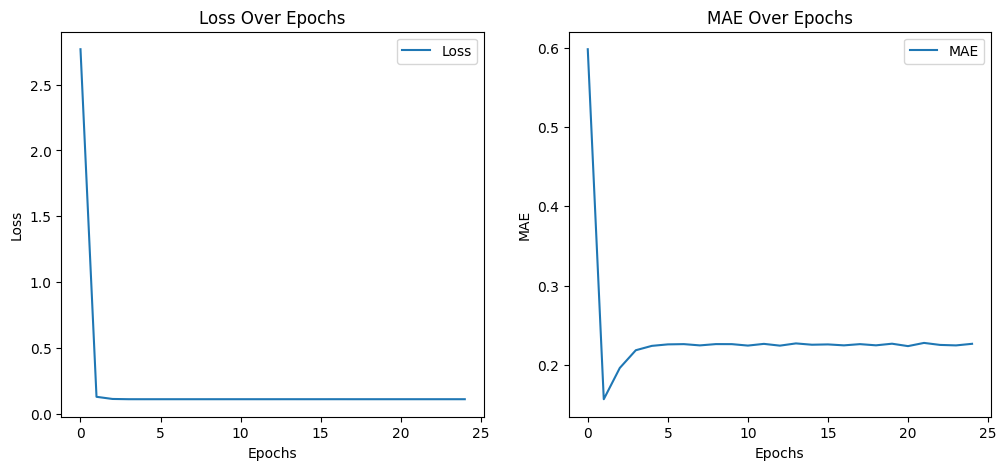

In [206]:
# Plot loss and mae
plt.figure(figsize=(12, 5))

# Plot validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE Over Epochs')
plt.legend()

plt.show()

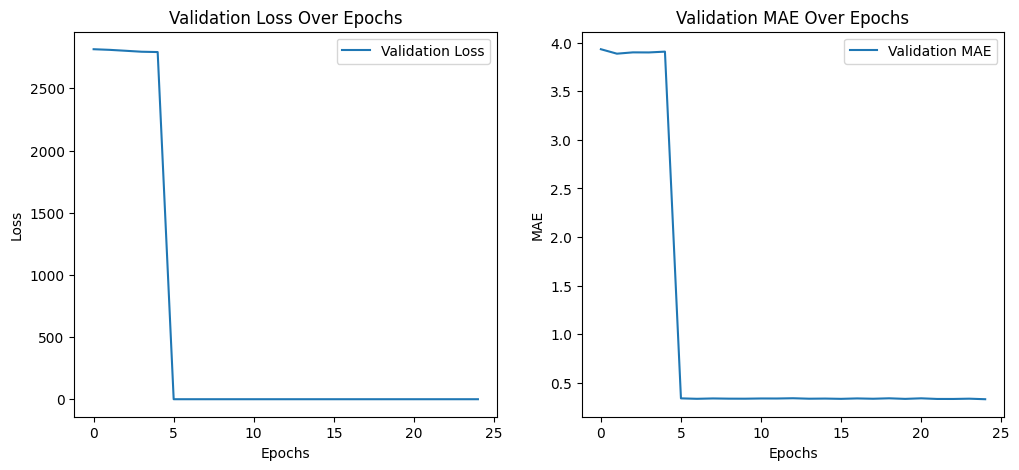

In [205]:

# Plot val_loss and val_mae
plt.figure(figsize=(12, 5))

# Plot validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()

# Plot validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Validation MAE Over Epochs')
plt.legend()

plt.show()


### Observation


**Training Loss and MAE**

**Loss:** This is the error calculated on the training data during each epoch. It is used by the model to adjust its weights and improve its performance. Common loss functions include Mean Squared Error (MSE), Mean Absolute Error (MAE), and binary cross-entropy.

**MAE (Mean Absolute Error):** This is a specific type of loss function that measures the average absolute difference between the predicted values and the actual values. It is used to evaluate the model's performance on the training data.

**Validation Loss and Validation MAE**

**Validation Loss:**
This is the error calculated on the validation data during each epoch. The validation data is a subset of the data that is not used for training but is used to evaluate the model's performance. Validation loss helps in monitoring the model's ability to generalize to unseen data.

**Validation MAE:** Similar to validation loss, validation MAE measures the average absolute difference between the predicted values and the actual values on the validation data. It provides insights into how well the model is performing on data it hasn't seen during training.
Differences

**Training vs. Validation:** Training loss and MAE are calculated on the training data, while validation loss and MAE are calculated on the validation data. The validation data is used to simulate how the model will perform on new, unseen data.

**Purpose:** Training metrics (loss and MAE) are used to optimize the model during training. Validation metrics (validation loss and validation MAE) are used to monitor the model's performance and prevent overfitting.

### Step 4: Test

In [225]:
# Select 5% of data randomly as test data
sampled_loan_data_df = loan_data_df.sample(frac=0.05, random_state=42)
print(sampled_loan_data_df.head(1))


      credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
8558              0        2    0.1545       453.52       10.596635  14.52   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
8558   657             3810.0       8545        82.2               3   

      delinq.2yrs  pub.rec  not.fully.paid  
8558            0        0               0  


In [201]:
#  Define target and independent variables
X_test = sampled_loan_data_df.drop('not.fully.paid', axis=1)
y_test = sampled_loan_data_df['not.fully.paid']

### Step 5: Evaluate

In [230]:

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [231]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8559
Confusion Matrix:
[[410   0]
 [ 69   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       410
           1       0.00      0.00      0.00        69

    accuracy                           0.86       479
   macro avg       0.43      0.50      0.46       479
weighted avg       0.73      0.86      0.79       479



In [241]:

# Assuming variable is your variable
if isinstance(sampled_loan_data_df, pd.DataFrame):
  print("The variable is a DataFrame.")
else:
  print("The variable is not a DataFrame.")

sampled_loan_data_df

The variable is a DataFrame.


credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
8558              0        2    0.1545       453.52       10.596635  14.52   
4629              1        2    0.1183       533.46       11.156251  10.89   
1383              1        1    0.1146       197.75       10.348173  13.73   
8142              0        0    0.1646       106.16       11.002100  28.16   
1768              1        0    0.1221       159.92       11.127322   3.99   
...             ...      ...       ...          ...             ...    ...   
7322              1        2    0.1496       346.47       10.621327  16.42   
2138              1        5    0.0737       111.77       11.034954   3.50   
4420              1        1    0.1392       163.86       10.933107   8.78   
1429              1        2    0.1051       162.54       10.404778   2.40   
8137              0        2    0.1615       450.96       10.896739  20.20   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
8558   657        3810.000000       8545        82.2               3   
4629   732        3600.000000      15942        40.9               3   
1383   692        2069.958333      14154        85.8               0   
8142   672        6480.041667       7846        25.8               4   
1768   702        5040.000000        468         7.2               1   
...    ...                ...        ...         ...             ...   
7322   687        6701.041667      16591        15.3               0   
2138   777        6630.000000       5514        19.5               0   
4420   702        3842.958333       4645        96.8               2   
1429   767        3848.000000       1411        35.3               1   
8137   657        3390.041667      18511        72.6               0   

      delinq.2yrs  pub.rec  not.fully.paid  
8558            0        0               0  
4629            0        0               0  
1383            0        0               1  
8142            1        0               0  
1768            1        0               0  
...           ...      ...             ...  
7322            1        0               0  
2138            0        0               0  
4420            0        0               0  
1429            0        0               0  
8137            0        0               0  

[479 rows x 14 columns]

In [262]:
# Extracting only one row of data
sampled_loan_data_01 = sampled_loan_data_df.iloc[0]
print(sampled_loan_data_01)


credit.policy           0.000000
purpose                 2.000000
int.rate                0.154500
installment           453.520000
log.annual.inc         10.596635
dti                    14.520000
fico                  657.000000
days.with.cr.line    3810.000000
revol.bal            8545.000000
revol.util             82.200000
inq.last.6mths          3.000000
delinq.2yrs             0.000000
pub.rec                 0.000000
not.fully.paid          0.000000
Name: 8558, dtype: float64


In [263]:
# Assuming variable is your variable
if isinstance(sampled_loan_data_01, pd.DataFrame):
  print("The variable is a DataFrame.")
else:
  print("The variable is not a DataFrame.")

The variable is not a DataFrame.


In [264]:
sampled_loan_data_01_df = pd.DataFrame([sampled_loan_data_01])

# Assuming variable is your variable
if isinstance(sampled_loan_data_01_df, pd.DataFrame):
  print("The variable is a DataFrame.")
else:
  print("The variable is not a DataFrame.")

sampled_loan_data_01_df.head()


The variable is a DataFrame.


credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
8558            0.0      2.0    0.1545       453.52       10.596635  14.52   

       fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
8558  657.0             3810.0     8545.0        82.2             3.0   

      delinq.2yrs  pub.rec  not.fully.paid  
8558          0.0      0.0             0.0

In [265]:
#  Define target and independent variables
X_test_01_df = sampled_loan_data_01_df.drop('not.fully.paid', axis=1)
y_test_01_df = sampled_loan_data_01_df['not.fully.paid']
print(y_test_01_df)

8558    0.0
Name: not.fully.paid, dtype: float64


In [266]:
# Use the model to predict
y_pred_01 = (model.predict(X_test_01_df) > 0.5).astype("int32")
print(y_pred_01)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0]]


**Observation**

The model was able to predict the outcome correctly

In [267]:
sampled_loan_data_02 = sampled_loan_data_df.iloc[2]
print(sampled_loan_data_02)
sampled_loan_data_02_df = pd.DataFrame([sampled_loan_data_02])

credit.policy            1.000000
purpose                  1.000000
int.rate                 0.114600
installment            197.750000
log.annual.inc          10.348173
dti                     13.730000
fico                   692.000000
days.with.cr.line     2069.958333
revol.bal            14154.000000
revol.util              85.800000
inq.last.6mths           0.000000
delinq.2yrs              0.000000
pub.rec                  0.000000
not.fully.paid           1.000000
Name: 1383, dtype: float64


In [268]:
#  Define target and independent variables
X_test_02_df = sampled_loan_data_02_df.drop('not.fully.paid', axis=1)
y_test_02_df = sampled_loan_data_02_df['not.fully.paid']
print(y_test_02_df)


1383    1.0
Name: not.fully.paid, dtype: float64


In [269]:
# Use the model to predict
y_pred_02 = (model.predict(X_test_02_df) > 0.5).astype("int32")
print(y_pred_02)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0]]


In [270]:
model.predict(X_test_02_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[0.12627496]], dtype=float32)

**Observation**

The model was **NOT abl**e to predict the outcome correctly

## **5.3 Test Different Modeling Parameters**

### Change Epochs

In [279]:
# Define architecture

model_02 = Sequential()
model_02.add(Input(shape=(13,)))
model_02.add(Dense(50, activation='relu'))
model_02.add(Dense(25, activation='relu'))
model_02.add(Dense(13, activation='relu'))
model_02.add(Dense(1, activation='linear'))

In [280]:
model_02.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [290]:
model_02.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 50)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 13)             │           338 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,983 (27.28 KB)

 Trainable params: 2,327 (9.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,656 (18.19 KB)

In [281]:
# Train the model and store the history
history_02 = model_02.fit(X_train, y_train,
          epochs=50,
          batch_size=10,
          validation_split=0.2,
          )

Epoch 1/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1249293.0000 - mae: 276.0648 - val_loss: 9266.6553 - val_mae: 18.4634
Epoch 2/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 120.6344 - mae: 7.8539 - val_loss: 2036.7592 - val_mae: 9.4369
Epoch 3/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 94.5739 - mae: 6.2916 - val_loss: 7659.7305 - val_mae: 13.3738
Epoch 4/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 51.8725 - mae: 5.0244 - val_loss: 5340.0674 - val_mae: 9.4541
Epoch 5/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 130.3520 - mae: 6.7040 - val_loss: 2197.8743 - val_mae: 9.6161
Epoch 6/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 911.3285 - mae: 11.2878 - val_loss: 1244.5897 - val_mae: 9.8449
Epoch 7/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 61.0522 - mae: 4.4269 - val_loss: 1101.8053 - val_mae: 9.1474
Epoch 8/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 377.1511 - mae: 8.8696 - val_loss: 12117.8320 - val_mae: 37.7572
Epoch 9/

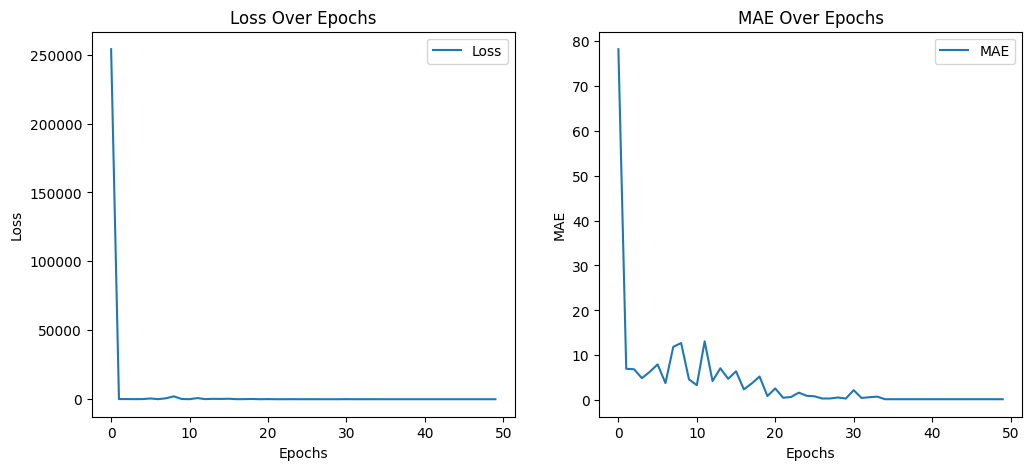

In [284]:
# Plot loss and mae
plt.figure(figsize=(12, 5))

# Plot validation loss
plt.subplot(1, 2, 1)
plt.plot(history_02.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot validation MAE
plt.subplot(1, 2, 2)
plt.plot(history_02.history['mae'], label='MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE Over Epochs')
plt.legend()

plt.show()

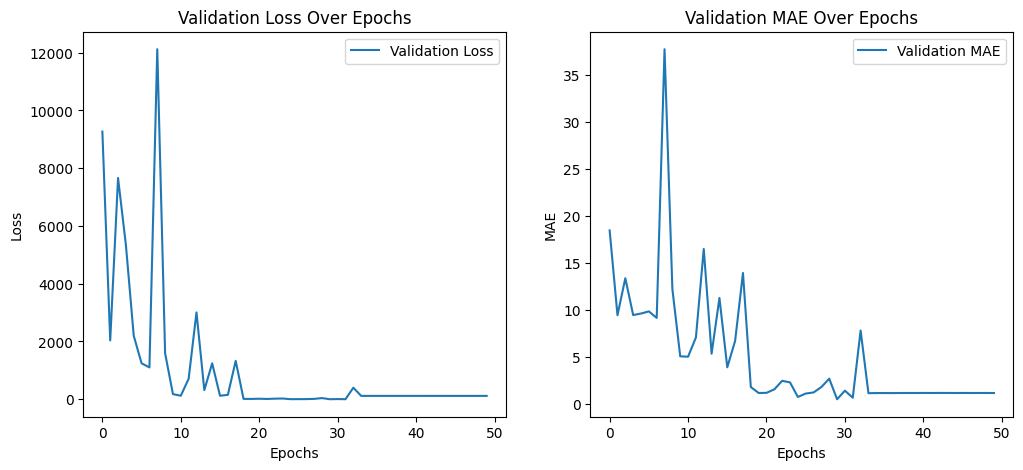

In [285]:

# Plot val_loss and val_mae
plt.figure(figsize=(12, 5))

# Plot validation loss
plt.subplot(1, 2, 1)
plt.plot(history_02.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()

# Plot validation MAE
plt.subplot(1, 2, 2)
plt.plot(history_02.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Validation MAE Over Epochs')
plt.legend()

plt.show()

In [286]:
# Evaluate the model
y_pred = (model_02.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.8518
Confusion Matrix:
[[405   5]
 [ 66   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       410
           1       0.38      0.04      0.08        69

    accuracy                           0.85       479
   macro avg       0.62      0.52      0.50       479
weighted avg       0.79      0.85      0.80       479



In [298]:
# Use the model to predict
y_pred_01 = (model_02.predict(X_test_01_df) > 0.5).astype("int32")
print(y_pred_01)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0]]


**Observation**

The model was able to predict the outcome correctly

In [299]:
# Use the model to predict
y_pred_02 = (model_02.predict(X_test_02_df) > 0.5).astype("int32")
print(y_pred_02)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0]]


In [300]:
model_02.predict(X_test_02_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.12242005]], dtype=float32)

**Observation**

The model was **NOT abl**e to predict the outcome correctly